**Locating the boundary of the image with having a white (light) background**



In [47]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

**Loading the image on memory as a numpy array**

In [48]:
#load image on numpy array
image = plt.imread("E:\\Python\\boundary_detection\\test_image1.jpg")
#check type of image object for succesful import
type(image)

numpy.ndarray

In [49]:
#Check shape of the image
image.shape

(820, 1870, 3)

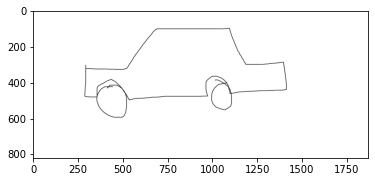

In [50]:
#Display image 
plt.imshow(image)
plt.show()

For calculation purpose, the image is converted into a 2D array from 3D array by taking sum on axis 2 (depth axis).

The flat image is considered for reading the values of pixels

In [51]:
#flatten the image across axis 2
flat_image = np.sum(image, axis=2)

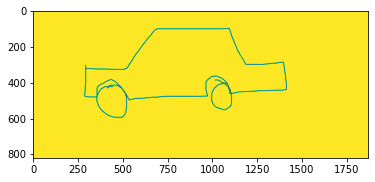

In [52]:
#display flat image
plt.imshow(flat_image)

For value comparison with pixel values in numpy array, the background(being light in colour), the minimum and maximum values are reco0rded.

In [53]:
#Find minimum and maximum value from flat image array
min_value = np.min(flat_image)
max_value = np.max(flat_image)
(min_value, max_value)

(0, 765)

The image is extracted from the main image by comparing the pixel values.

If the pixel value does not correspond to the background pixel value, then it is extracted to the arrays maintained for storing the corresponding co-ordinates of the image(boundary).

In [54]:
#Extracting the main image from the array
x = list()
y = list()
for i in range(flat_image.shape[0]):
    for j in range(flat_image.shape[-1]):
        if flat_image[i][j] != max_value:
            x.append(j)
            y.append(i)

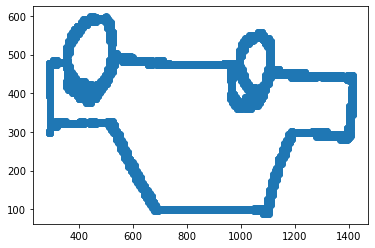

In [55]:
plt.scatter(x, y)
plt.show()

**The above figure shows the representation of images done by matplotlib internally in a numpy array**

The image is inverted and shown accordingly

**Definining the Binding rectangle**

In order to define the binding rectangle for the image, 4 points are required.
- Lowermost point
- Uppermost point
- Point at extreme left
- Point at extreme right

In order to extract the above points, the flattened image array is traversed through row wise and points are extracted accordingly.


In [56]:
#locating lowermost and uppermost points
l_x = flat_image.shape[1]
r_x = 0
u_y = 0
b_y = flat_image.shape[0]
for i in range(flat_image.shape[0]):
    for j in range(flat_image.shape[1]):
        if flat_image[i][j] != max_value:
            if i < b_y :
                b_y = i
            elif i > u_y :
                u_y = i
            if j < l_x:
                l_x = j
            elif j > r_x:
                r_x = j

The rectangle is defined by the lower left corner, width and height in terms of pixel values refering to the co-ordinate system.

In [57]:
#Computing the width and height
width = r_x - l_x
height = u_y - b_y
(width, height)

(1127, 511)

**Plotting the computed boundary**

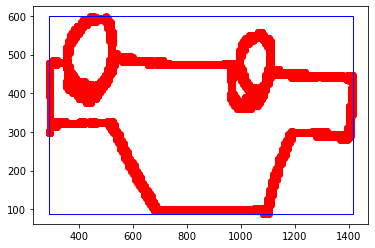

In [58]:
#Plotting the binding rectangle on the extracted co-ordinates.
figure, axis = plt.subplots(1)
axis.scatter(x, y, color="red")
binding_rectangle = Rectangle((l_x, b_y), width, height, linewidth=1, edgecolor='b', facecolor='none')
axis.add_patch(binding_rectangle)
plt.show()

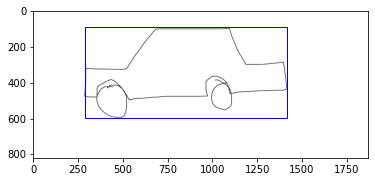

In [59]:
figure, axis = plt.subplots(1)
axis.imshow(image)
binding_rectangle = Rectangle((l_x, b_y), width, height, linewidth=1, edgecolor='b', facecolor='none')
axis.add_patch(binding_rectangle)
plt.show()